In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import random
import IPython.display as ipd

In [2]:
train_df = pd.read_csv('data/Train.csv')

In [3]:
train_df.head()

Word_id Swahili_word English_translation
0  id_v8rz06e6rv31.wav        mbili                 two
1  id_vmbwicdpfn68.wav         tatu               three
2  id_injlouhxg1hg.wav         ndio                 yes
3  id_gdq23p6xgzya.wav          nne                four
4  id_lpstklz51zpz.wav         nane               eight

In [4]:
train_df['Swahili_word'].value_counts()
# perfectly balanced

mbili     350
tatu      350
ndio      350
nne       350
nane      350
hapana    350
sita      350
tisa      350
moja      350
saba      350
tano      350
kumi      350
Name: Swahili_word, dtype: int64

In [5]:
# Sample some words
for word in random.sample(train_df['Swahili_word'].unique().tolist(), 6):
    sample = train_df[train_df['Swahili_word'] == word]['Word_id'].sample(1).values[0]
    display(word, sample, ipd.Audio('data/Swahili_words/'+ sample ))

'tisa'

'id_v52azydqljby.wav'

'ndio'

'id_7f91xbvh8spl.wav'

'mbili'

'id_y292nl3x6duc.wav'

'saba'

'id_nv9tg427jl4g.wav'

'moja'

'id_hr94bh5q9wez.wav'

'tatu'

'id_7mw802r5vbqh.wav'

In [6]:
dict_samples=dict()
for word in train_df['Swahili_word'].unique().tolist():
    sample = train_df[train_df['Swahili_word'] == word]['Word_id'].sample(3).values[:]
    dict_samples[word] = sample

In [7]:
dict_samples

{'mbili': array(['id_3br9ywygak8i.wav', 'id_2lmkko4tzyvh.wav',
        'id_vcmfmh6bmz55.wav'], dtype=object),
 'tatu': array(['id_fhf58s7p19xu.wav', 'id_0n3dnzolbbde.wav',
        'id_euagjw23rgmv.wav'], dtype=object),
 'ndio': array(['id_090vpkdgsp0f.wav', 'id_iatzadf2xl3h.wav',
        'id_mcyfw04niq80.wav'], dtype=object),
 'nne': array(['id_5juf26o9qcz4.wav', 'id_dl262g0r5749.wav',
        'id_f26rd0c7qh5l.wav'], dtype=object),
 'nane': array(['id_x0x5dr3tydnl.wav', 'id_eahwk1zr1pun.wav',
        'id_2lpkjo7vgfxc.wav'], dtype=object),
 'hapana': array(['id_e6igencrkmg2.wav', 'id_iibctj967t32.wav',
        'id_xzo5lt3ssdpd.wav'], dtype=object),
 'sita': array(['id_pltowd7g4tvm.wav', 'id_n39l4uejrf9x.wav',
        'id_oqy9dhu0sdjd.wav'], dtype=object),
 'tisa': array(['id_px1vfsokq0uu.wav', 'id_cdb5n9ghvf92.wav',
        'id_lrduy4kd0l9m.wav'], dtype=object),
 'moja': array(['id_t6iq5dxildyj.wav', 'id_446q4vr9uf8y.wav',
        'id_xwsb8xlusaaq.wav'], dtype=object),
 'saba': array(['

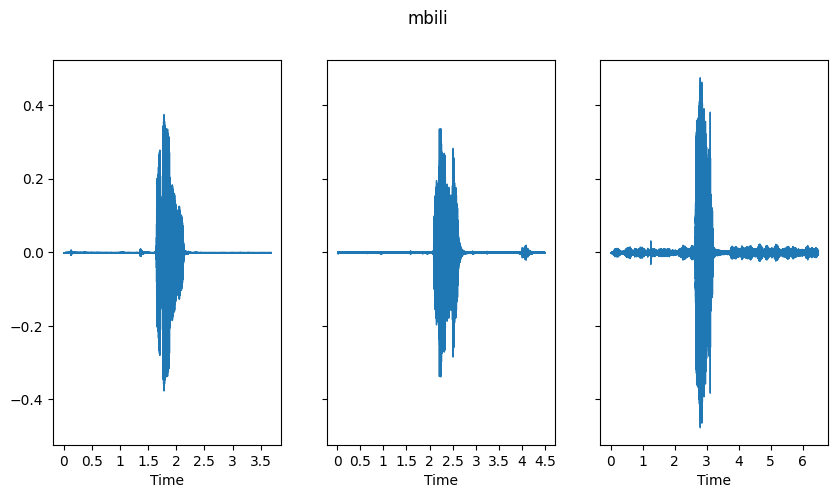

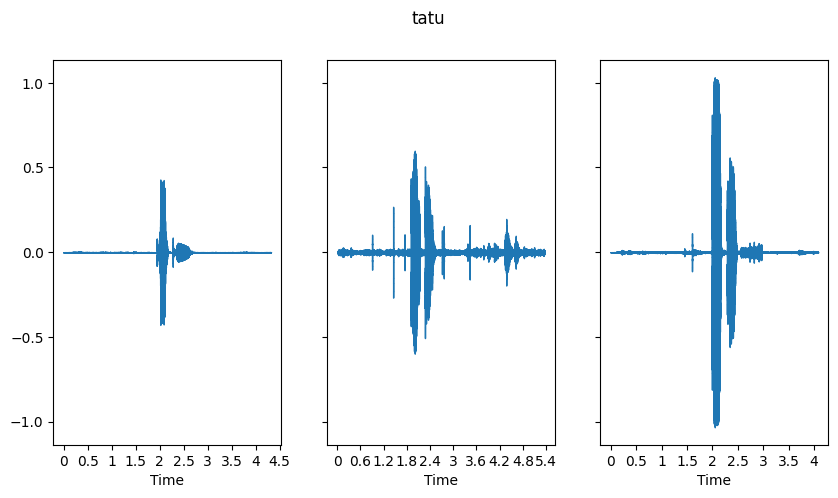

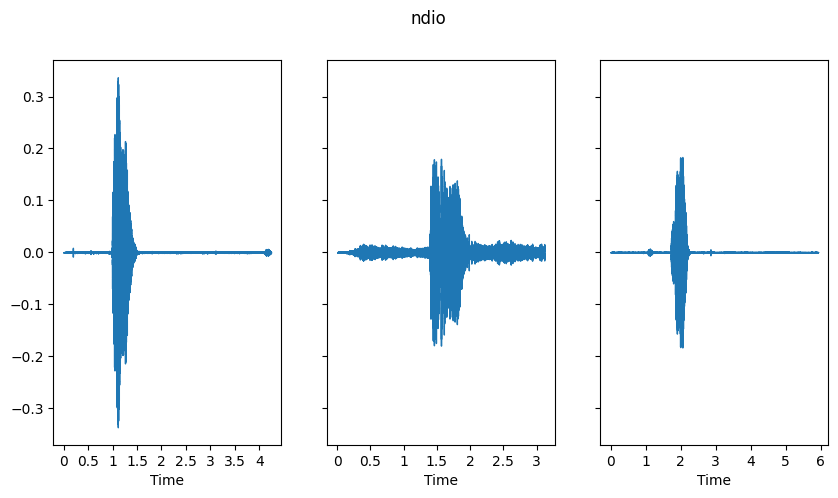

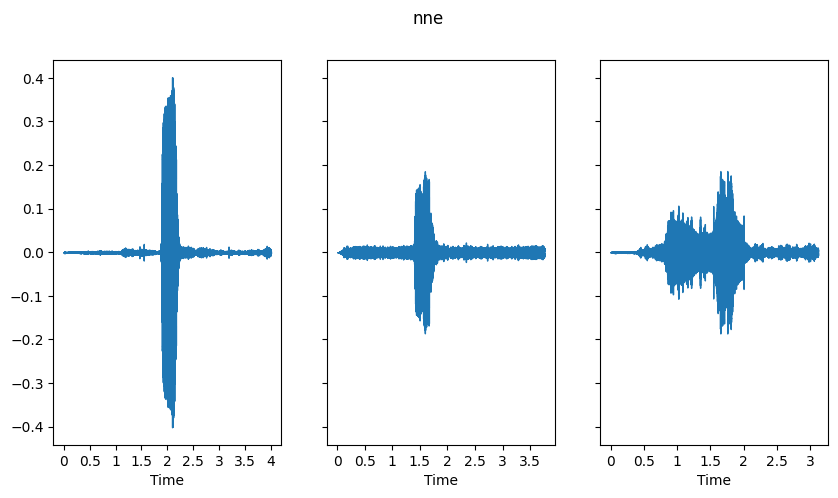

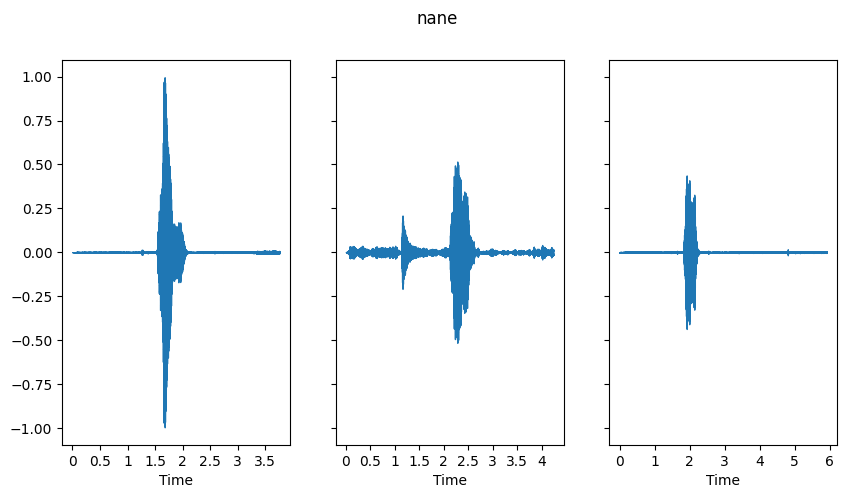

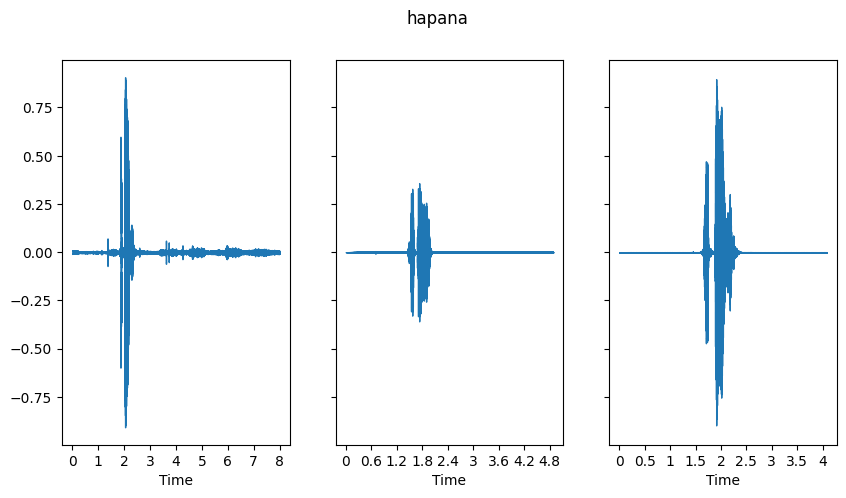

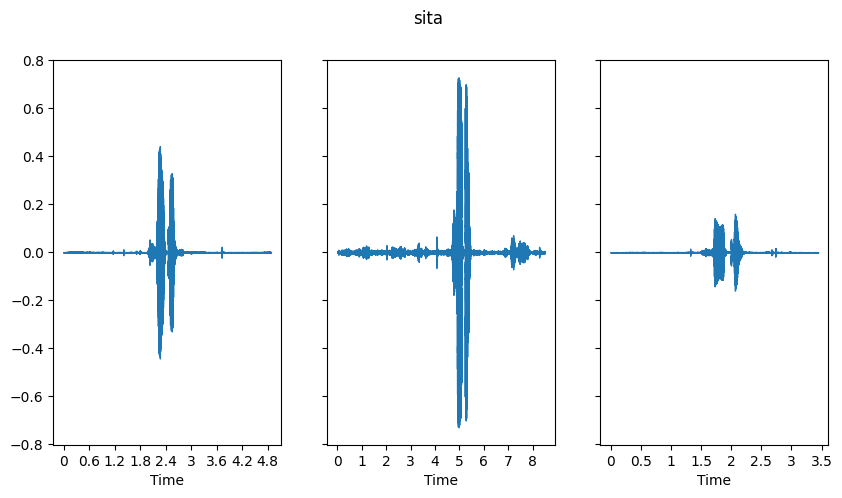

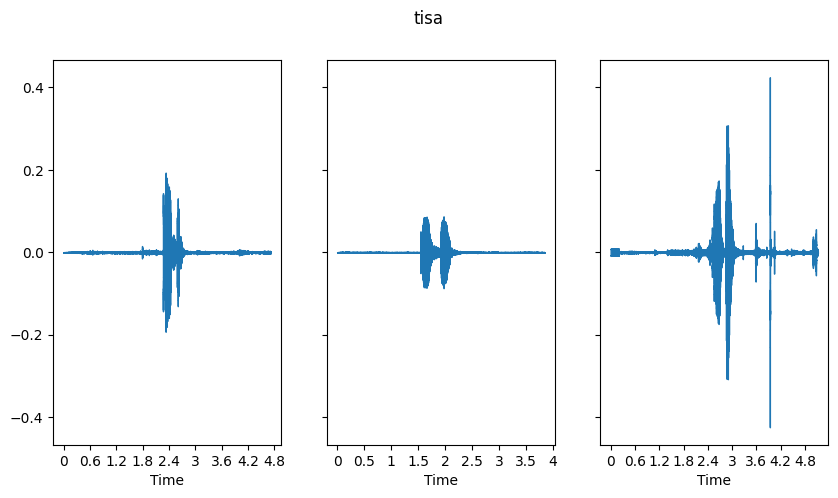

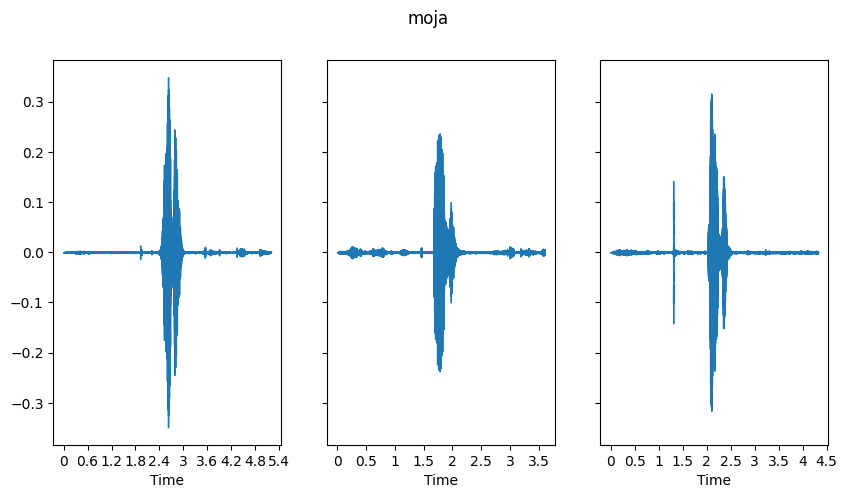

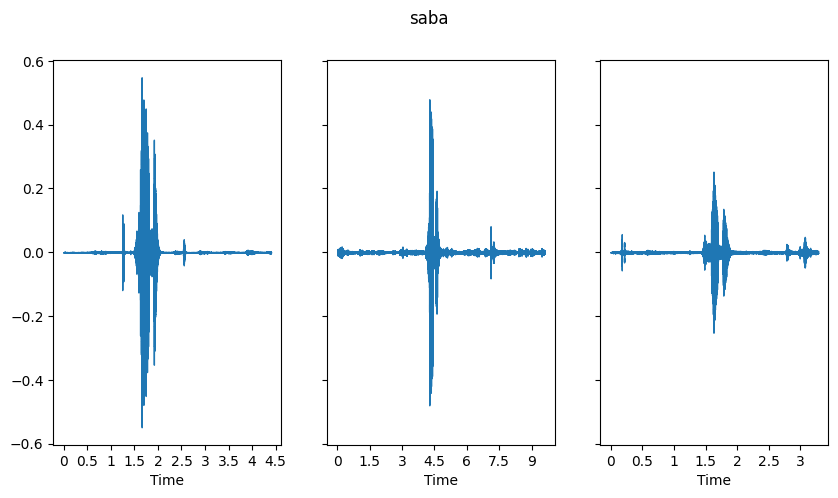

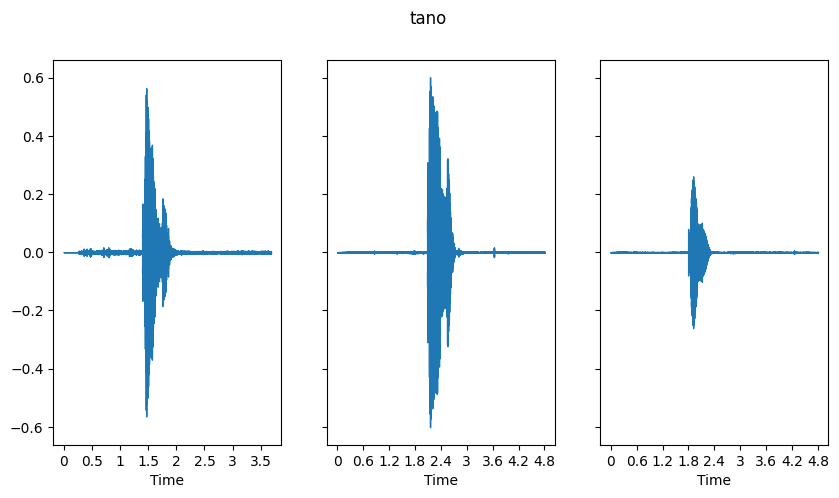

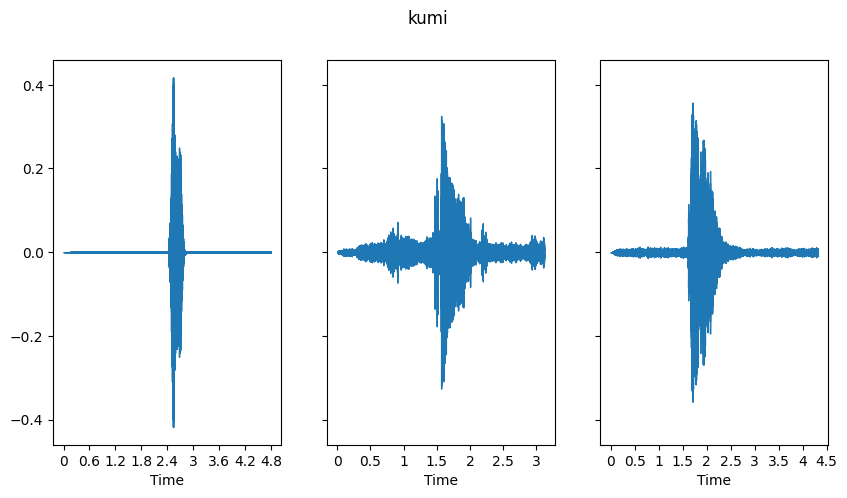

In [8]:
# show three wavefiles for all words in time domain, for easy comparison between the words
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('data/Swahili_words/'+audiofile)
        img = librosa.display.waveshow(x, sr=sr, ax=ax[i])
        i+=1


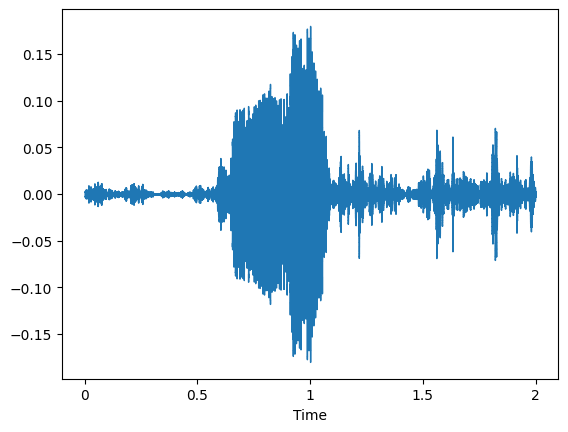

In [9]:
# filter out irrelevant silence in the wave-files by centering around the spoken words with +- 1 second.
x, sr = librosa.load('data/Swahili_words/id_js3zqqy5ly15.wav')
#assuming the talking is the loudest part of the audio signal, the wavefiles are centered around the maximum +-1sec. 
ind_max = x.argmax()
x_2sec = x[ind_max-sr:ind_max+sr]
img = librosa.display.waveshow(x_2sec, sr=sr)

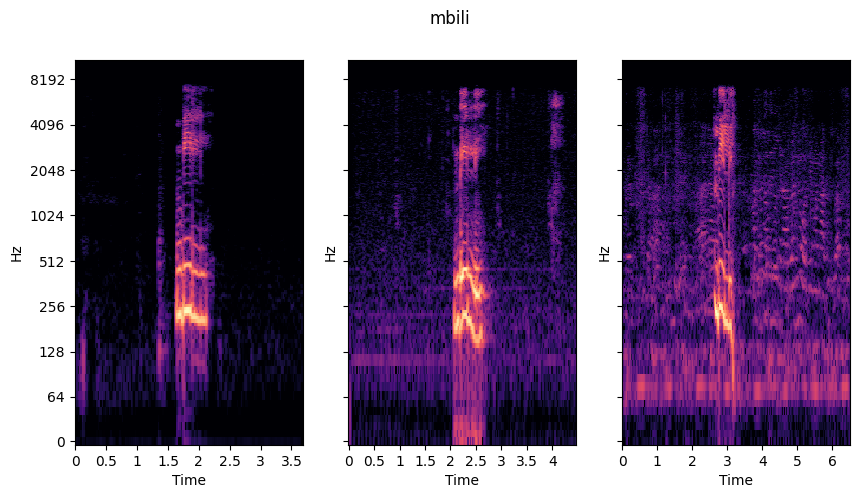

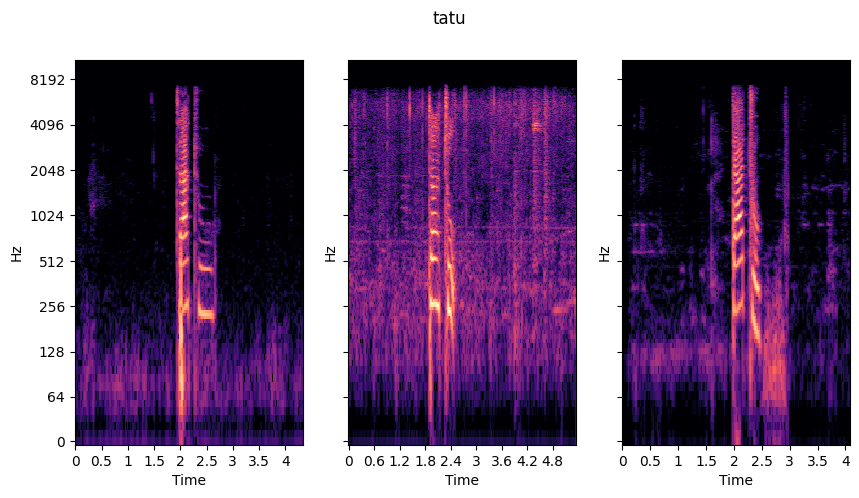

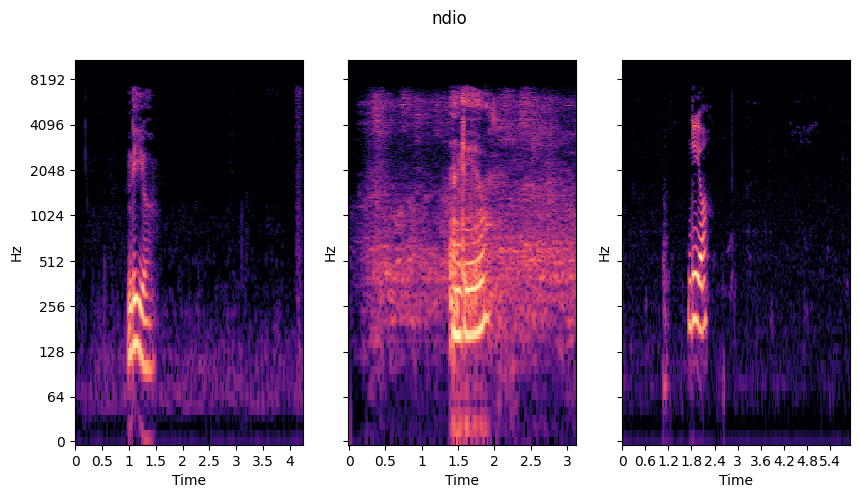

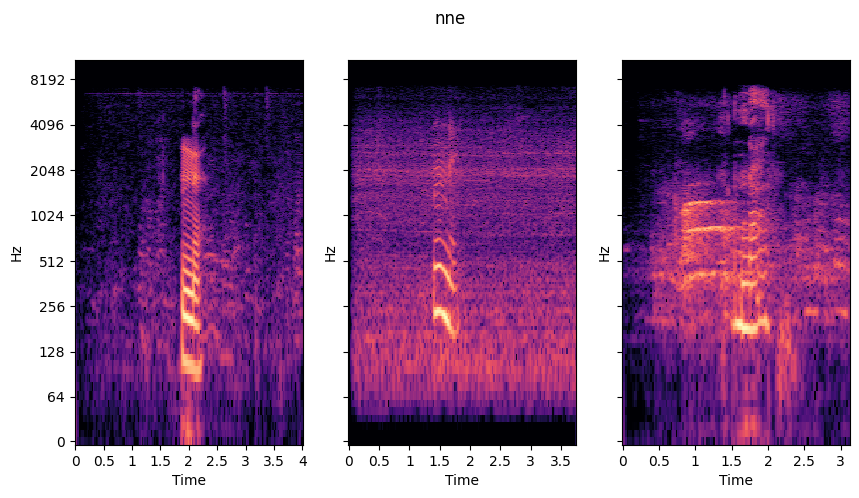

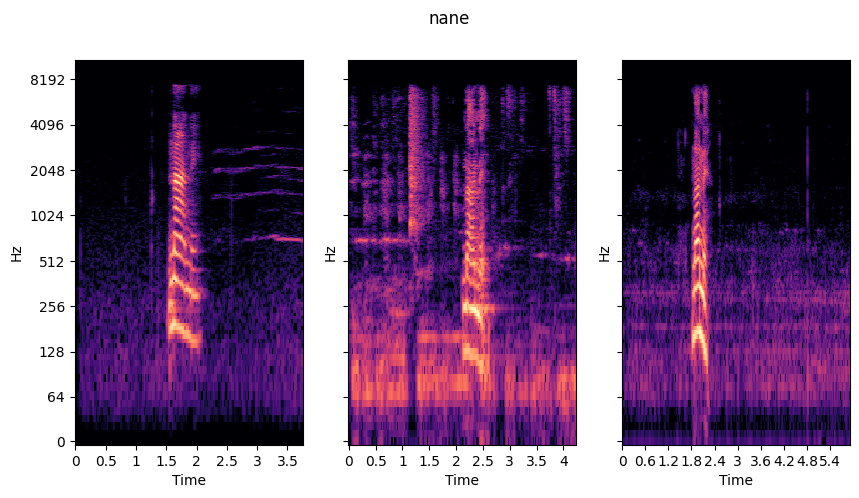

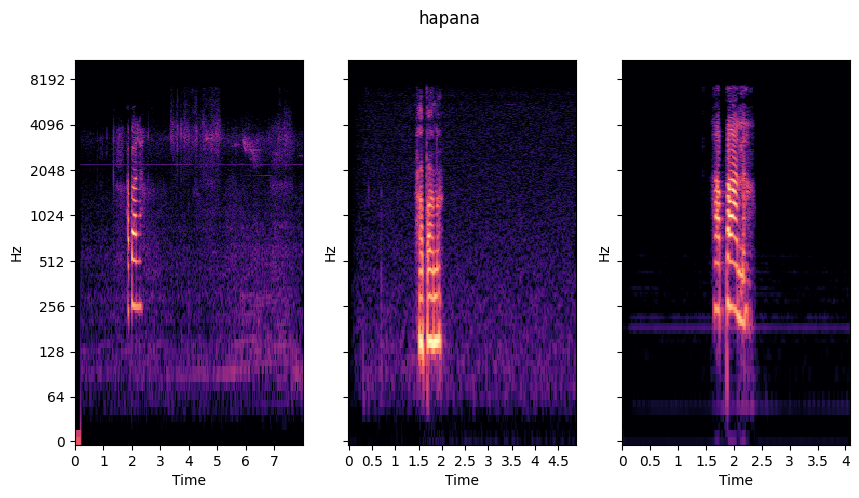

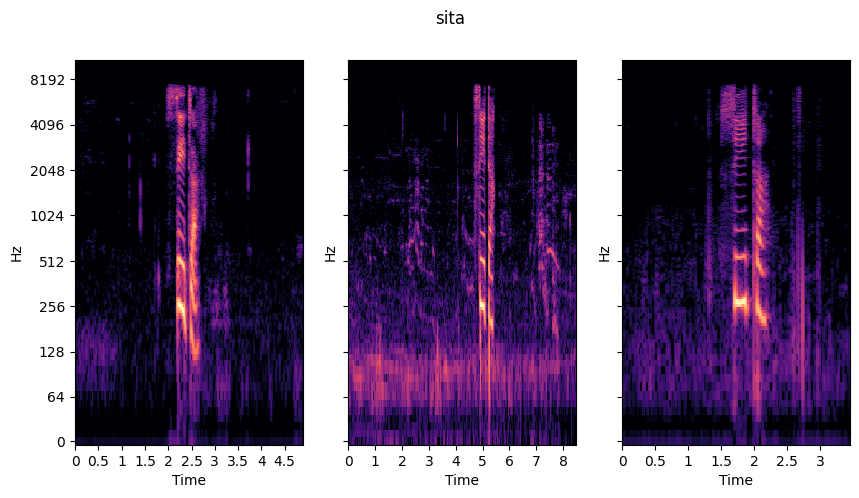

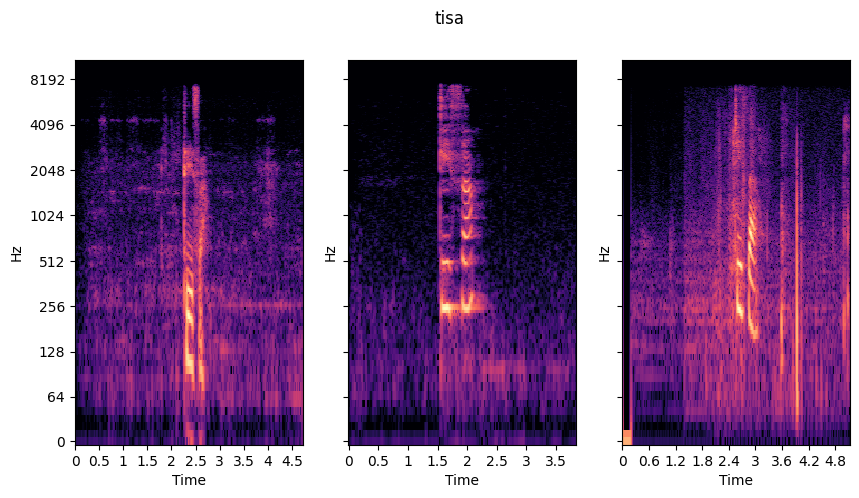

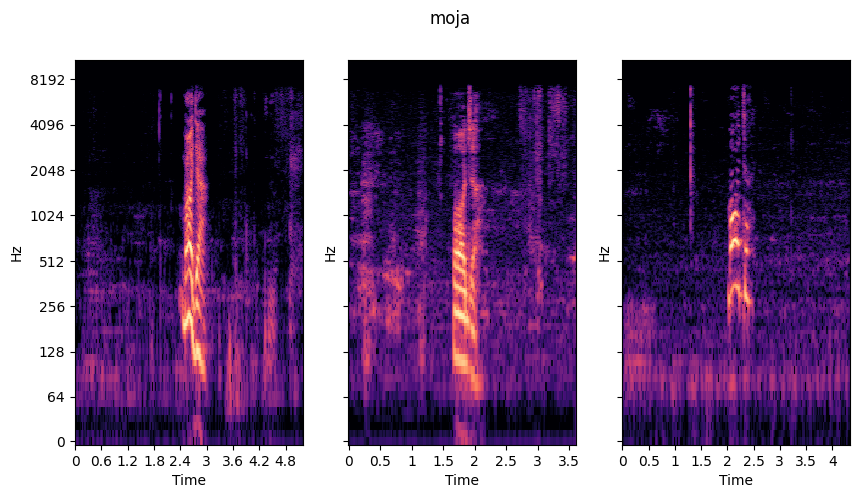

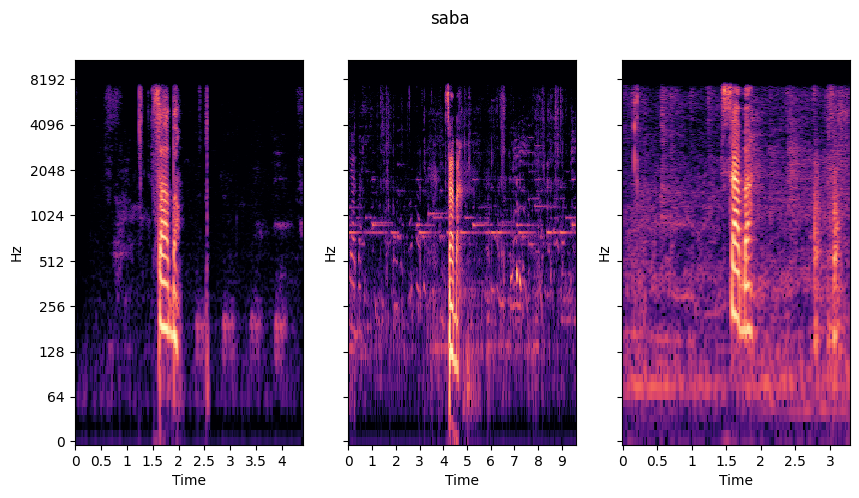

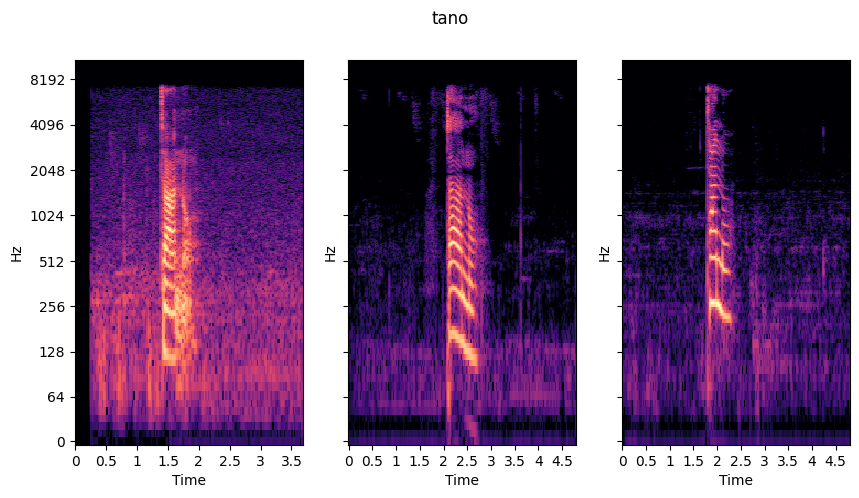

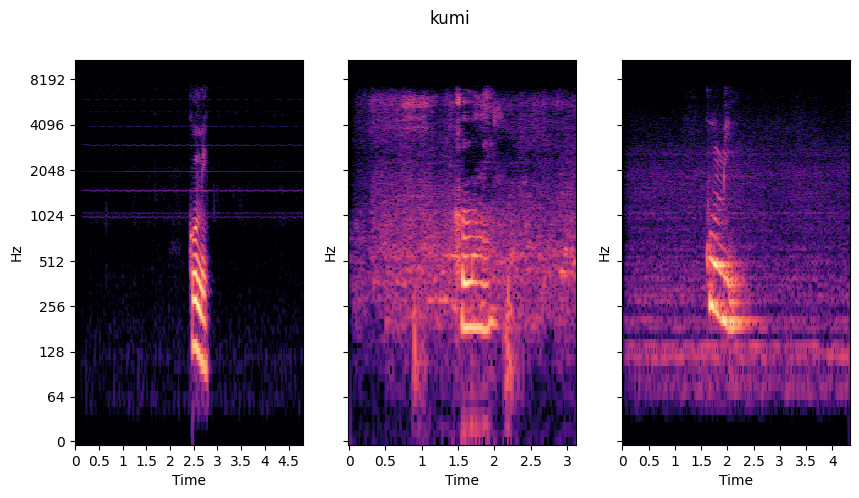

In [11]:
# show the three files of each word time-centered in frequency domain
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('data/Swahili_words/'+audiofile)
        X = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
        img = librosa.display.specshow(X, y_axis='log', x_axis='time', sr=sr, ax=ax[i])
        # # finding the spectral centroid at each timestep
        # cent = librosa.feature.spectral_centroid(y=x_2sec, sr=sr)
        # times = librosa.times_like(cent)
        # ax[i].plot(times, cent.T, label='Spectral centroid', color='w')
        i+=1

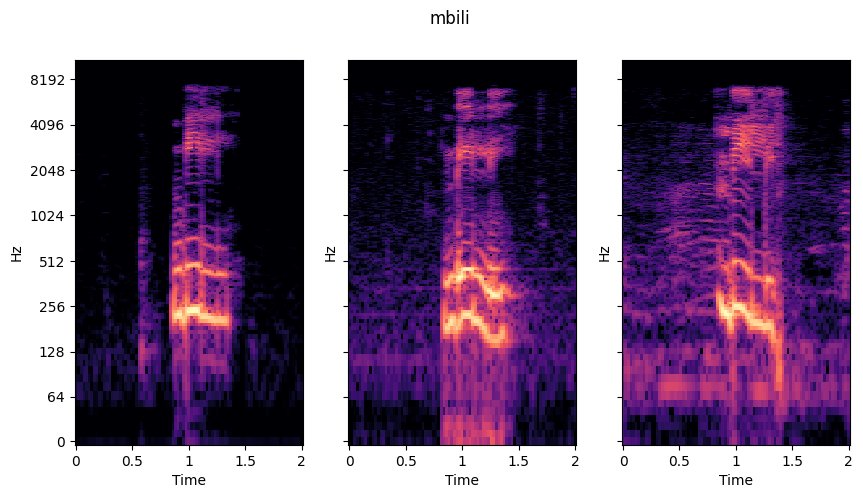

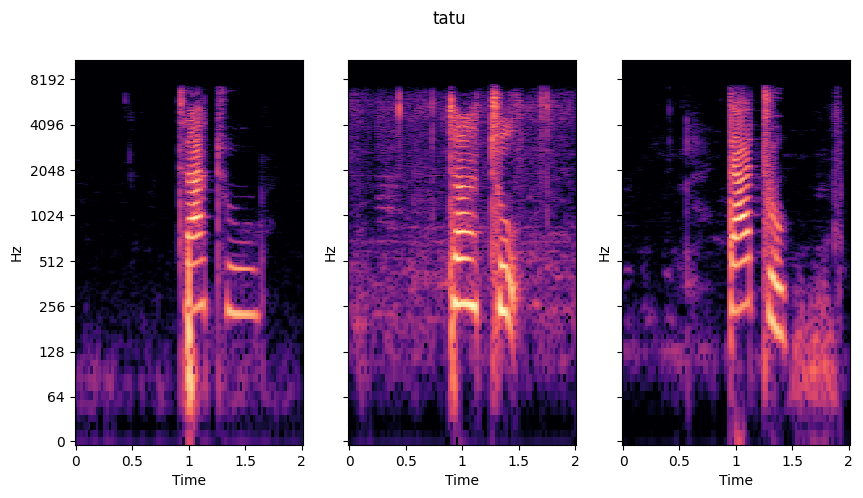

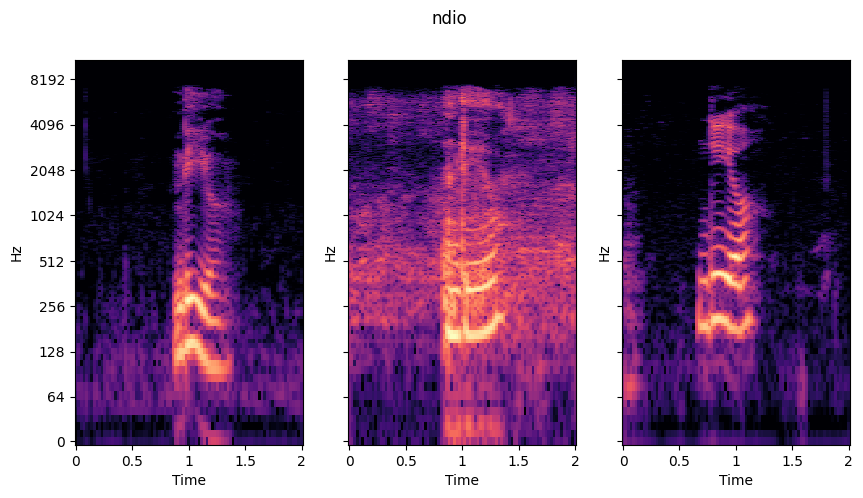

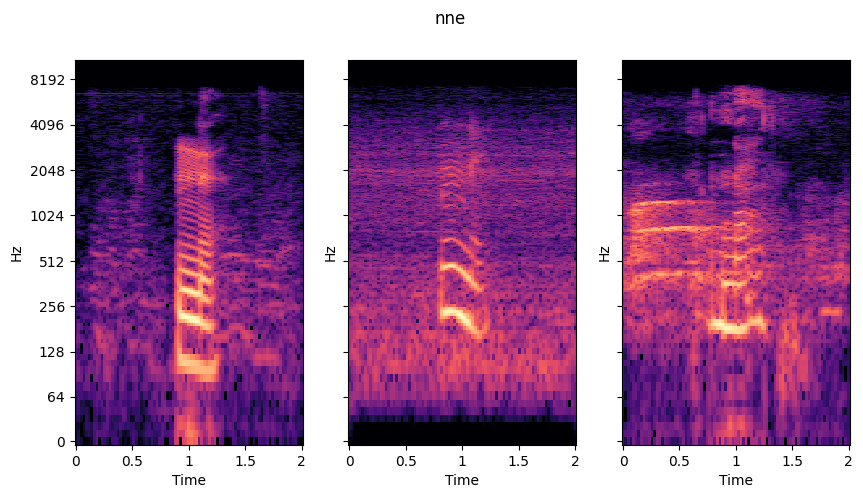

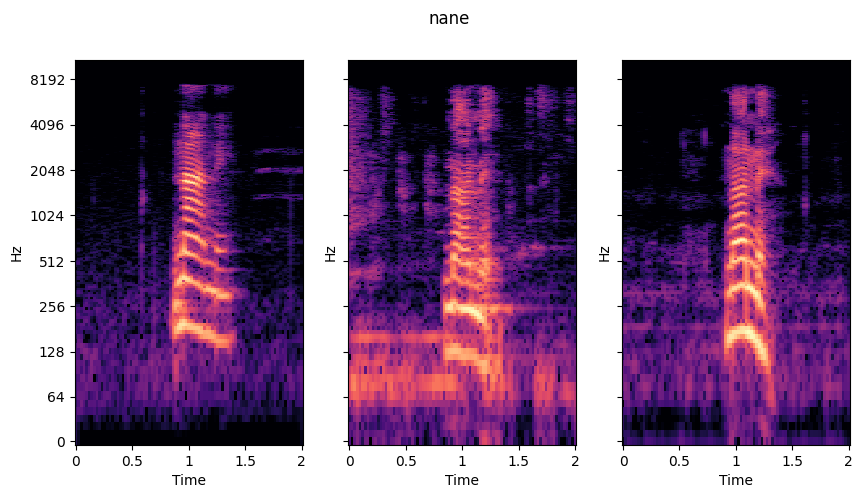

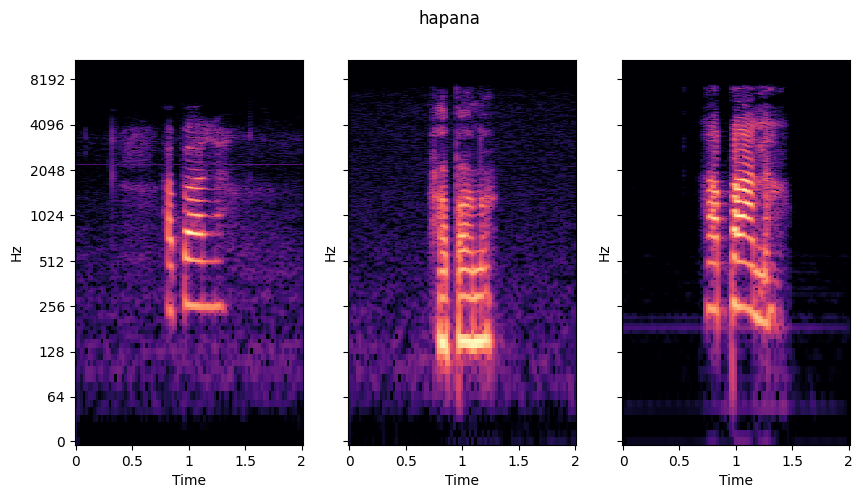

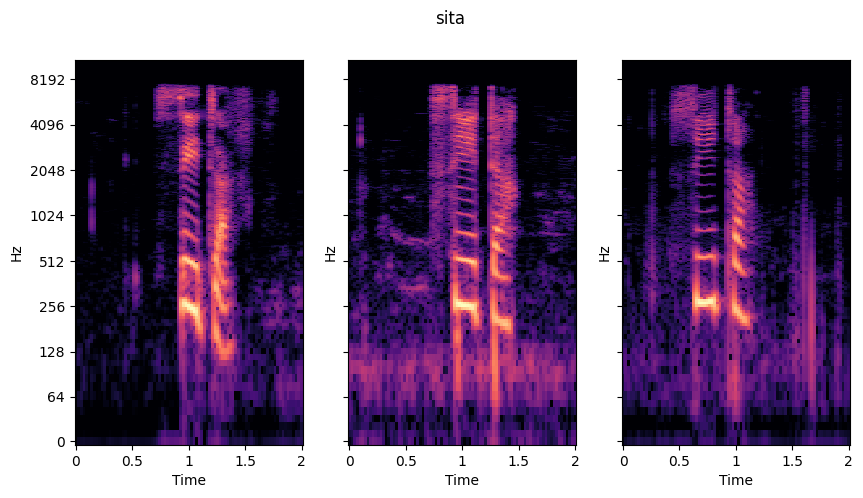

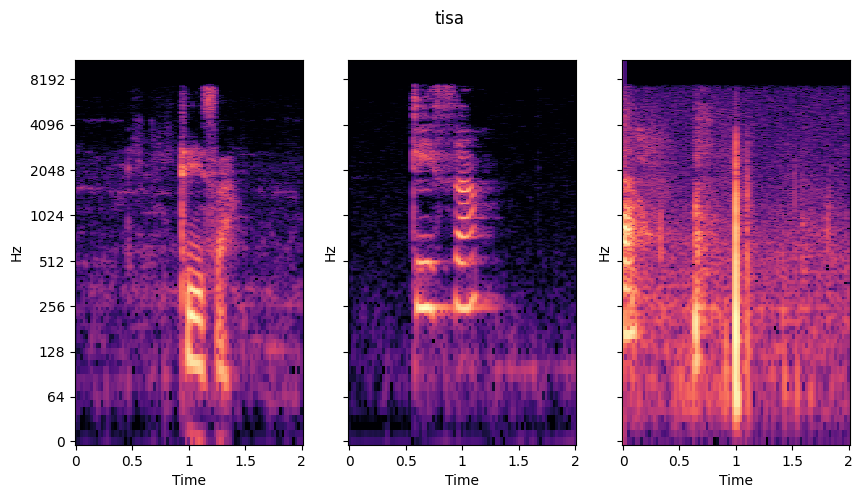

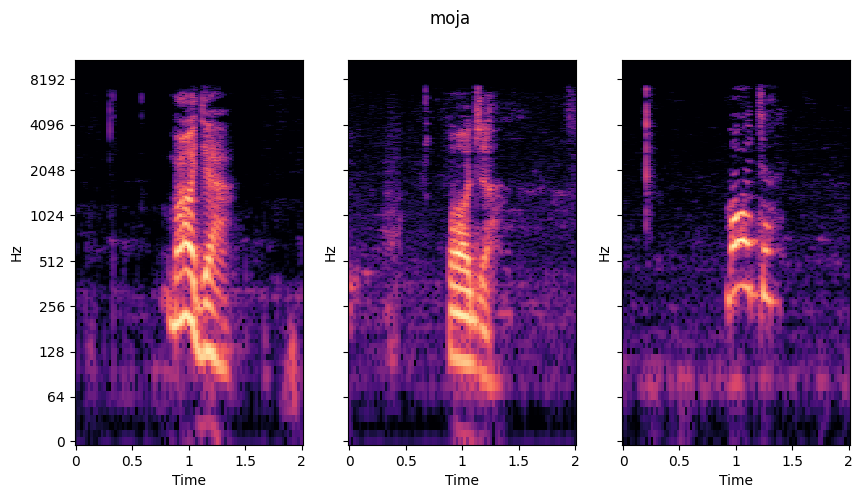

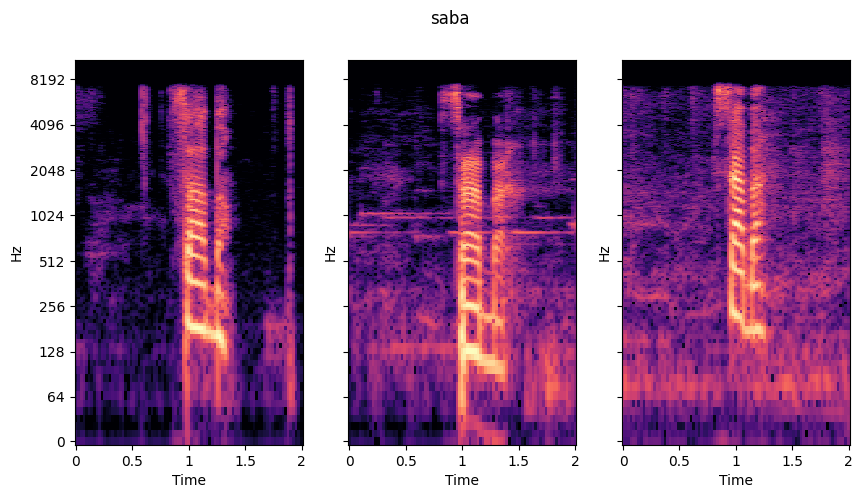

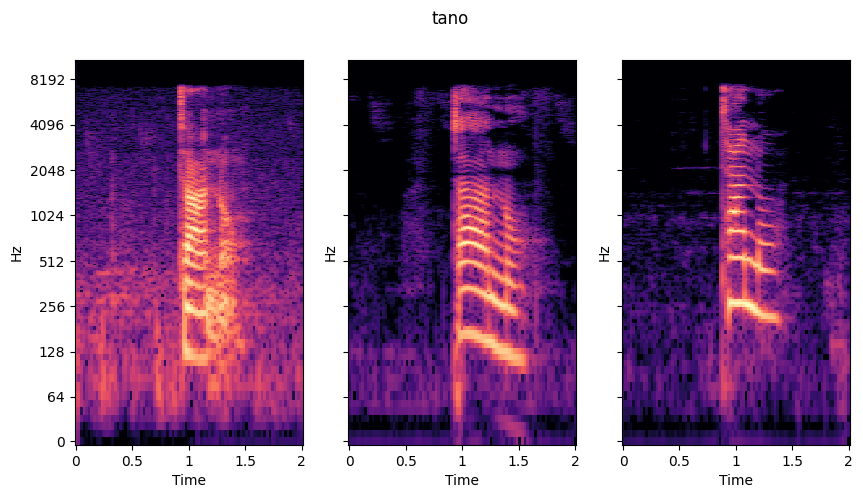

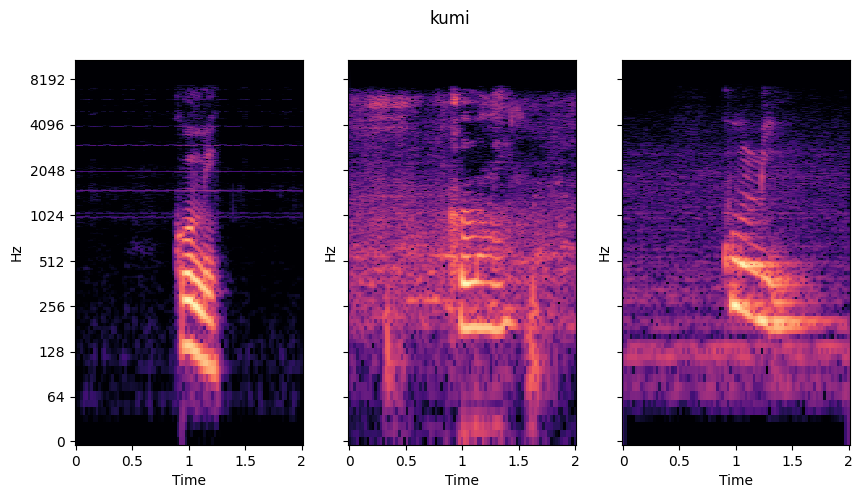

In [10]:
# show the three files of each word time-centered in frequency domain
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('data/Swahili_words/'+audiofile)
        # filtering +-1sec around the loudest part, centering the wavefiles to spoken word 
        ind_max = x.argmax()
        x_2sec = x[ind_max-sr:ind_max+sr]
        X = librosa.amplitude_to_db(np.abs(librosa.stft(x_2sec)), ref=np.max)
        img = librosa.display.specshow(X, y_axis='log', x_axis='time', sr=sr, ax=ax[i])
        # # finding the spectral centroid at each timestep
        # cent = librosa.feature.spectral_centroid(y=x_2sec, sr=sr)
        # times = librosa.times_like(cent)
        # ax[i].plot(times, cent.T, label='Spectral centroid', color='w')
        i+=1


## Wrong Data 

* id_p0w83k2cxaq7 (tatu) are totally wrong words. Nothing that is part of the challenge


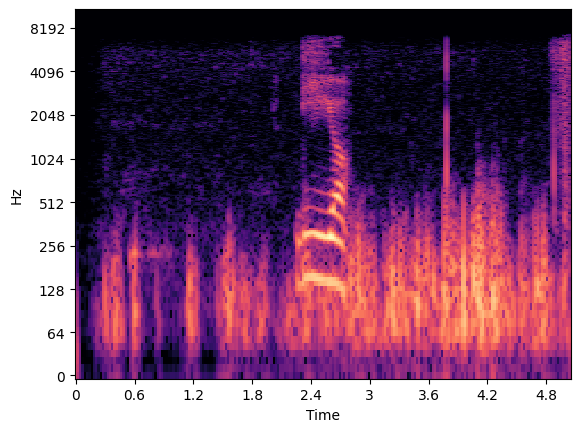

In [16]:
x, sr = librosa.load('data/Swahili_words/id_js3zqqy5ly15.wav')
x_spec = np.abs(librosa.stft(x))
X = librosa.amplitude_to_db(x_spec, ref=np.max)
img = librosa.display.specshow(X, y_axis='log', x_axis='time', sr=sr)

In [19]:
x_spec

array([[8.50299418e-01, 4.40265030e-01, 1.10669345e-01, ...,
        1.61172986e-01, 7.39337131e-02, 2.71357805e-01],
       [9.19857442e-01, 6.40113592e-01, 1.10590540e-01, ...,
        1.42288044e-01, 1.60156831e-01, 2.74131358e-01],
       [1.02437508e+00, 8.11845601e-01, 9.96583700e-02, ...,
        5.75665161e-02, 8.72883350e-02, 3.29050094e-01],
       ...,
       [3.83834367e-06, 1.91953654e-06, 2.33699549e-09, ...,
        1.77891707e-07, 1.02247100e-03, 2.23863334e-03],
       [3.84031819e-06, 1.91833624e-06, 8.58406179e-10, ...,
        1.16713096e-07, 1.02230185e-03, 2.23857840e-03],
       [3.84012401e-06, 1.91676372e-06, 8.39196435e-10, ...,
        1.89783023e-07, 1.02255563e-03, 2.23860354e-03]], dtype=float32)

In [20]:
X

array([[-34.62865 , -40.345806, -52.339542, ..., -49.07424 , -55.84324 ,
        -44.549244],
       [-33.94568 , -37.094948, -52.34573 , ..., -50.15672 , -49.12918 ,
        -44.460915],
       [-33.01091 , -35.03062 , -53.249813, ..., -58.01669 , -54.400963,
        -42.874847],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [23]:
X.shape

(1025, 218)

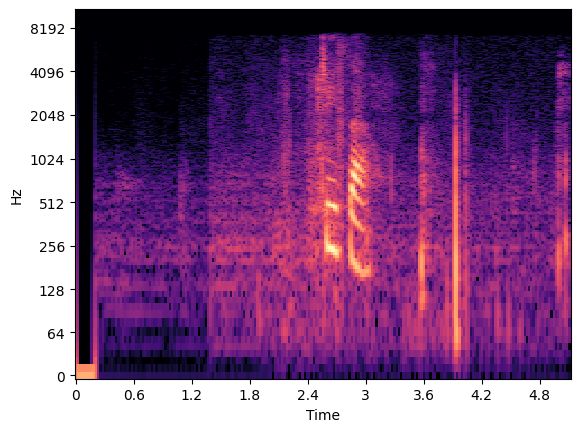

In [42]:
x, sr = librosa.load('data/Swahili_words/id_lrduy4kd0l9m.wav')
x_spec = np.abs(librosa.stft(x))
X = librosa.amplitude_to_db(x_spec, ref=np.max)
img = librosa.display.specshow(X, y_axis='log', x_axis='time', sr=sr)

In [43]:
X.shape
# (Frequenz, Zeit)

(1025, 221)

In [56]:
X_mean_time = np.mean(X, axis=0) #, where=(X>-80)

In [57]:
X_std_time = np.std(X, axis=0) #, where=(X>-80)

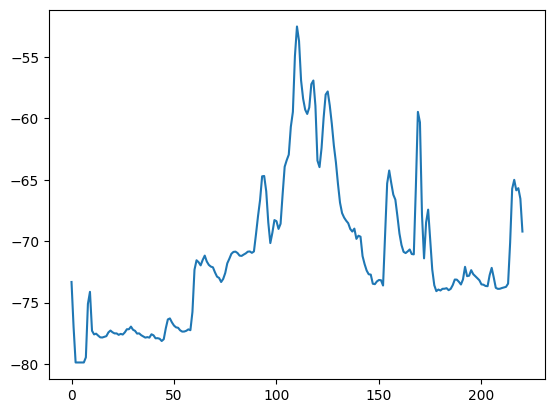

In [58]:
plt.plot(X_mean_time)

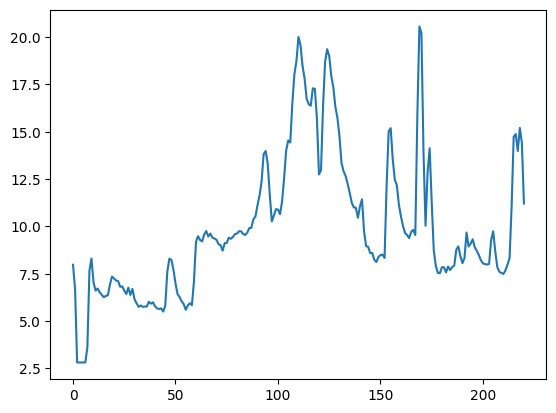

In [59]:
plt.plot(X_std_time)

In [48]:
X_mean_freq = np.mean(X, axis=1)

In [49]:
X_std_freq = np.std(X, axis=1)

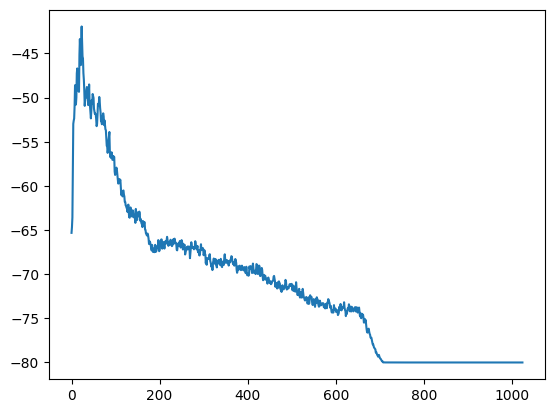

In [50]:
plt.plot(X_mean_freq)

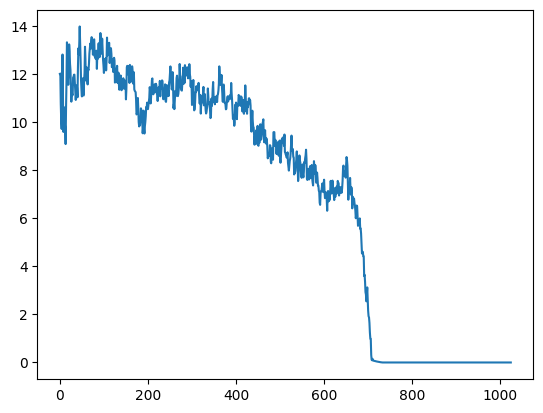

In [51]:
plt.plot(X_std_freq)